In [1]:
import numpy as np
import sys
import os
# sys.path.append('.conda/envs/shear/lib/python3.9/site-packages/')
import astropy.io.fits as pf
import matplotlib.pylab as mplot
%pylab inline
import fitsio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
metadata = np.genfromtxt('../code/measurement/tile_DR3_1_1_v2.csv', dtype='str', delimiter=",")[1:]
# print(metadata)

In [9]:
from astropy.table import Table, vstack
CAT = []

shear_dir = '/project2/chihway/data/decade/shearcat_v1/'
coadd_dir = '/project2/chihway/data/decade/coaddcat_v1/'

for i in range(1000,1100):
    tile = metadata[i][0][2:-1]
#     print(tile)
    
    if os.path.exists(shear_dir+'metacal_output_'+tile+'.fits') and os.path.exists(coadd_dir+'gold_mask_'+tile+'.npz'):
        #shear_cat = fitsio.read(shear_dir+'metacal_output_'+tile+'.fits')
        fits = fitsio.FITS(shear_dir+'metacal_output_'+tile+'.fits')
        shear_cat = fits[1].read(vstorage='object')
        shear_id = np.load(shear_dir+'ids_match_'+tile+'.npz',allow_pickle=True)
        gold_mask = np.load(coadd_dir+'gold_mask_'+tile+'.npz',allow_pickle=True)
        gold_mask_full = gold_mask['maskSE']*gold_mask['maskIMA']*(gold_mask['maskSG']>=2) 
        # still using rough star/galaxy separation
        shear_id_masked_gold = shear_id['ids'][gold_mask_full]
        mask_joint = np.in1d(shear_cat['id'], shear_id_masked_gold)
        mask_joint_invert = np.in1d(shear_id_masked_gold, shear_cat['id'][mask_joint])
        ra = gold_mask['ra'][gold_mask_full][mask_joint_invert]
        dec = gold_mask['dec'][gold_mask_full][mask_joint_invert]
        flux_i = gold_mask['flux_i'][gold_mask_full][mask_joint_invert]
        flux_r = gold_mask['flux_r'][gold_mask_full][mask_joint_invert]
        flux_z = gold_mask['flux_z'][gold_mask_full][mask_joint_invert]

        tb = Table.read(shear_dir+'metacal_output_'+tile+'.fits', format='fits')[mask_joint]

        tb.add_columns([ra, dec, flux_i, flux_r, flux_z], names=['ra', 'dec', 'flux_i', 'flux_r', 'flux_z'])
        print(i, len(tb))
        CAT.append(tb)
    else:
        print('tile missing '+tile)



1000 13365
1001 15388
1002 16637
1003 25434
1004 11656
1005 7477
1006 12758
1007 16066
1008 9021
1009 14527
1010 22071
1011 18145
1012 15062
1013 18227
1014 24095
1015 17400
1016 21014
1017 20916
1018 16993
1019 20360
1020 16782
1021 13285
1022 35237
1023 17688
1024 11509
1025 31706
1026 17530
1027 8548
1028 18450
1029 15171
1030 15900
1031 12895
1032 17736
1033 16607
1034 11417
1035 15234
1036 13754
1037 20114
1038 23857
1039 15008
1040 15986
1041 19121
1042 16879
1043 16550
1044 16868
1045 17843
1046 16992
1047 16754
1048 16475
1049 24895
1050 16545
1051 21356
1052 18680
1053 18271
1054 20063
1055 14894
1056 14853
1057 11052
1058 32089
1059 19331
1060 13180
1061 8408
1062 17829
1063 11214
1064 21949
1065 17156
1066 13950
1067 12463
1068 18717
1069 8452
1070 16816
1071 5055
1072 12119
1073 22988
1074 25803
1075 18335
1076 17006
1077 33618
1078 9291
1079 15657
1080 20258
1081 18674
1082 19430
1083 14576
1084 11907
1085 26432
1086 17324
1087 18819
1088 561
1089 17106
1090 7263
1091 1727

In [10]:
new = vstack(CAT)
print(len(new))
print(len(new)*1.0/(500*0.5*60*60))
print(new)

1703410
1.8926777777777777
    id             x                  y          ...   flux_r    flux_z 
---------- ------------------ ------------------ ... --------- ---------
7093107266  282.5629272460628  32.83378601072309 ... 255.40086  437.0051
7093107265 4026.7468261719728  33.21224594116484 ... 571.47955 489.40878
7093107263  919.3209838866637  32.98273849492398 ...  562.5305 1372.7831
7093107262   5583.90136718758 33.328907012917625 ...   452.998 438.60254
7093107260  9229.982421874947   32.8388290404464 ... 321.64532  435.5991
7093107253  4650.207031249906   34.6862525940096 ... 413.11752  608.5407
7093107251 3922.0681152345046  36.44296646122439 ... 104.67092 519.05524
7093107249  9920.511718750076  34.75375366213302 ... 1165.4175 2808.9255
7093107246   8715.18847656265  32.80470275872358 ... 1644.0641 3258.6216
7093107243 345.41860961903967  37.60100555420104 ...  792.1856  801.1704
       ...                ...                ... ...       ...       ...
7182034627  5319.1157226

In [11]:
new.write('/scratch/midway2/chihway/metacal_test_1000-2000tiles_20230106.fits', overwrite=True)

In [ ]:
from fits2hdf.io.fitsio import read_fits
from fits2hdf.io.hdfio import export_hdf
a = read_fits('/scratch/midway2/chihway/metacal_test_1000-1500tiles_20230106.fits')
export_hdf(a, '/scratch/midway2/chihway/metacal_test_1000-1500tiles_20230106.hdf')

In [7]:
from fits2hdf.io.hdfio import export_hdf
export_hdf(new, '/scratch/midway2/chihway/metacal_test_1000-2000tiles_20230106.hdf')

ModuleNotFoundError: No module named 'fits2hdf'

In [6]:
# FLUX = np.array(FLUX)
# np.savez('flux_SE.npz', flux_i=hstack(FLUX))

In [7]:
len(new['flux_i'])

16591305

In [8]:
import healpy as hp

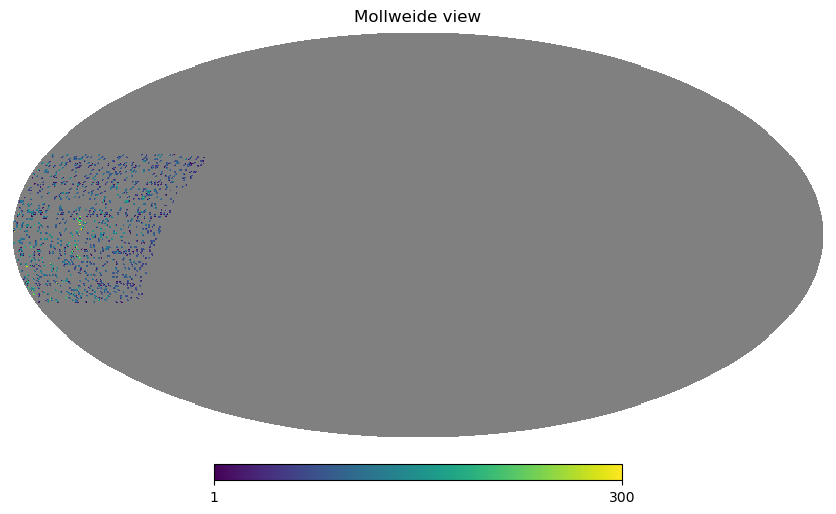

In [9]:
ra = new['ra'].copy()
dec = new['dec'].copy()

nside = 1024
theta = (90.-dec)/180*np.pi
phi = ra/180*np.pi
pix = hp.ang2pix(nside, theta, phi)
map_shearcat = np.zeros(hp.nside2npix(nside))
for i in range(len(pix)):
    map_shearcat[pix[i]] += 1
    
map_shearcat[map_shearcat==0] = hp.UNSEEN
hp.mollview(map_shearcat)

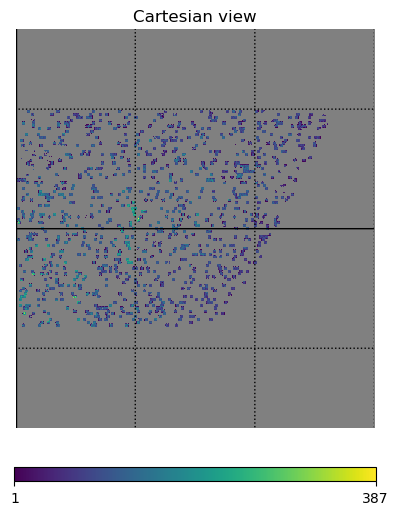

In [10]:
hp.cartview(map_shearcat, lonra=[90,180], latra=[-50,50])
hp.graticule()

In [ ]:
new.write('/scratch/midway3/chihway/metacal_test_1000tiles_20221108.fits.gz', overwrite=True)